In [ ]:
!git clone https://github.com/vaidehi0105/PCOS-IMAGE-DATASET.git

fatal: destination path 'PCOS-IMAGE-DATASET' already exists and is not an empty directory.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import random
import os
import cv2
import numpy as np
from tqdm import tqdm  # For progress bar
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# setting up input and output directories
input_dir_infected='/content/PCOS-IMAGE-DATASET/PCOS/infected'
input_dir_notinfected='/content/PCOS-IMAGE-DATASET/PCOS/notinfected'

output_dir_pcos='Augumented/Augumented_PCOS'
output_dir_notpcos='Augumented/Augumented_notPCOS'

In [ ]:
os.makedirs(output_dir_pcos, exist_ok=True)
os.makedirs(output_dir_notpcos, exist_ok=True)


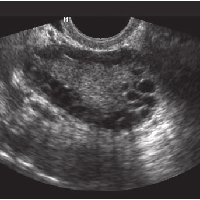

In [ ]:
# displaying PCOS images
import keras.utils as image
img_pcos=image.load_img('/content/PCOS-IMAGE-DATASET/PCOS/infected/img1.jpg',target_size=(200,200))
img_pcos

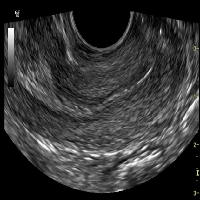

In [ ]:
#displaying Non -PCOS images
import keras.utils as image
img_notpcos=image.load_img('/content/PCOS-IMAGE-DATASET/PCOS/notinfected/img1.jpeg',target_size=(200,200))
img_notpcos

#Data Augumentation on both the classes

In [ ]:
from PIL import Image

In [ ]:


# Define the data augmentation functions
def apply_augmentation(image, augmentation_function):
    augmented_image = augmentation_function(image)

    return augmented_image

def random_flip(image):
    return cv2.flip(image, np.random.randint(0, 3))

def random_rotation(image, max_angle=130):
    angle = np.random.randint(-max_angle, max_angle)
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (width, height))



###Data augumentation for PCOS images

In [ ]:


# List all image files in the input directory
image_files = [f for f in os.listdir(input_dir_infected) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]

# Define the number of augmented images to generate per original image
num_augmentations = 5

# Perform data augmentation
for image_file in tqdm(image_files, desc="Augmenting images"):
    image_path = os.path.join(input_dir_infected, image_file)
    image = cv2.imread(image_path)

    for i in range(num_augmentations):
        augmented_image = apply_augmentation(image, random_flip)  # You can replace this function
        augmented_image = apply_augmentation(augmented_image, random_rotation)

        augmented_filename = f"augmented_{i+1}_{image_file}"
        augmented_filepath = os.path.join(output_dir_pcos, augmented_filename)
        cv2.imwrite(augmented_filepath, augmented_image)


Augmenting images: 100%|██████████| 781/781 [00:13<00:00, 56.47it/s]


###Data augumentation without PCOS

In [ ]:


# List all image files in the input directory
image_files = [f for f in os.listdir(input_dir_notinfected) if f.endswith('.jpg') or f.endswith('.png')]

# Define the number of augmented images to generate per original image
num_augmentations = 5

# Perform data augmentation
for image_file in tqdm(image_files, desc="Augmenting images"):
    image_path = os.path.join(input_dir_notinfected, image_file)
    image = cv2.imread(image_path)

    for i in range(num_augmentations):
        augmented_image = apply_augmentation(image, random_flip)  # You can replace this function
        augmented_image = apply_augmentation(augmented_image, random_rotation)

        augmented_filename = f"augmented_{i+1}_{image_file}"
        augmented_filepath = os.path.join(output_dir_notpcos, augmented_filename)
        cv2.imwrite(augmented_filepath, augmented_image)


Augmenting images: 100%|██████████| 780/780 [00:58<00:00, 13.44it/s]


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/Augumented')

Found 7805 files belonging to 2 classes.


In [ ]:
data_previous = tf.keras.utils.image_dataset_from_directory('/content/PCOS-IMAGE-DATASET')

Found 1562 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()


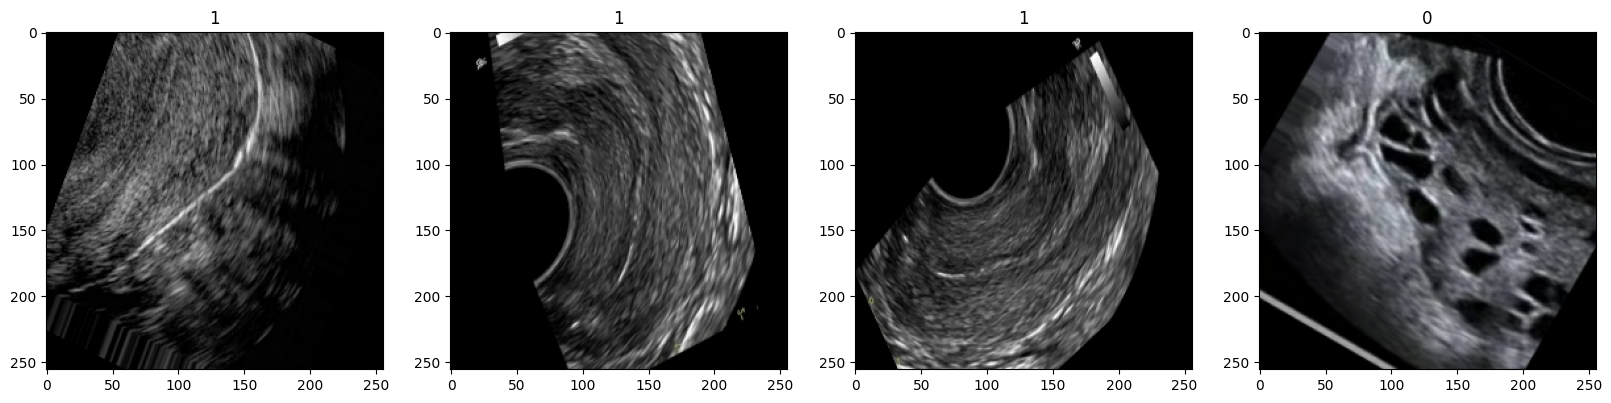

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Split Dataset

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(data))

244


In [ ]:
print(train_size)
print(val_size)
print(test_size)

170
48
24


In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#Model Building deep cnn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

#Building Deep CNN model

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 258064)            0         
                                                                 
 dense (Dense)               (None, 256)               66064640  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66065345 (252.02 MB)
Trainable params: 66065345 (252.02 MB)
Non-trainable params: 0 (0.00 Byte)
____________

#Training the model

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=2, validation_data=val, callbacks=[tensorboard_callback])

#Plot Performance

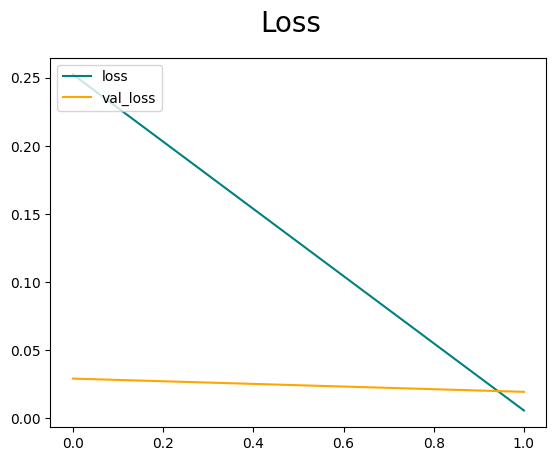

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

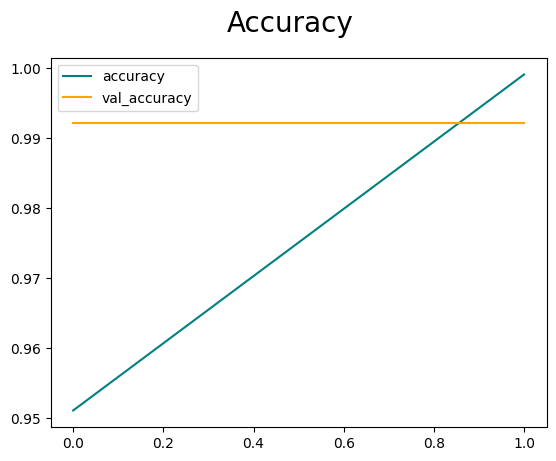

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluating the model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9921671, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.99609375, shape=(), dtype=float32)


#Testing the model

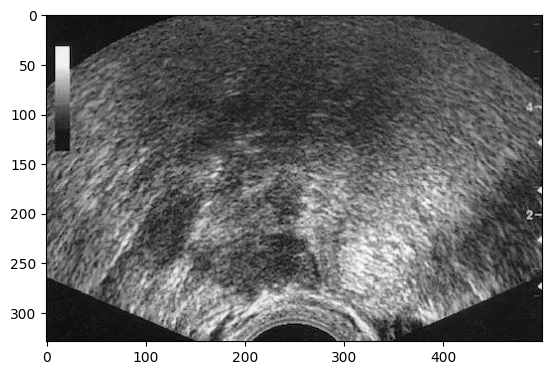

In [ ]:
import cv2
img = cv2.imread('/content/01APATNU.webp')
plt.imshow(img)
plt.show()


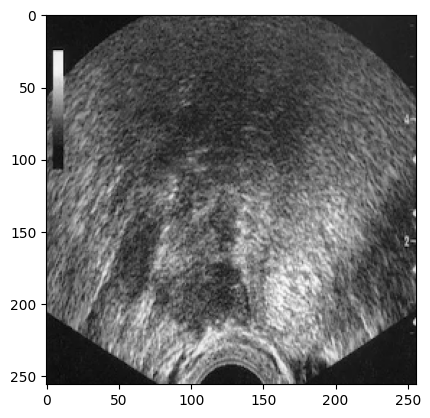

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
predictions = model.predict(np.expand_dims(resize/255, 0))
print(predictions)

1/1 [==============================] - 0s 19ms/step
[[0.99980074]]


In [ ]:
if predictions > 0.5:
    print(f'not PCOS')
else:
    print(f'PCOS')

not PCOS


#Save the model

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier_deepcnn.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#CNN WITH LAST LAYER SVM

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[256,256, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
newmodel_svm = cnn.fit(train, epochs=2, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/2
170/170 [==============================] - 78s 455ms/step - loss: 0.1528 - accuracy: 0.9436 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 2/2
170/170 [==============================] - 89s 522ms/step - loss: 0.0141 - accuracy: 0.9993 - val_loss: 0.0118 - val_accuracy: 1.0000


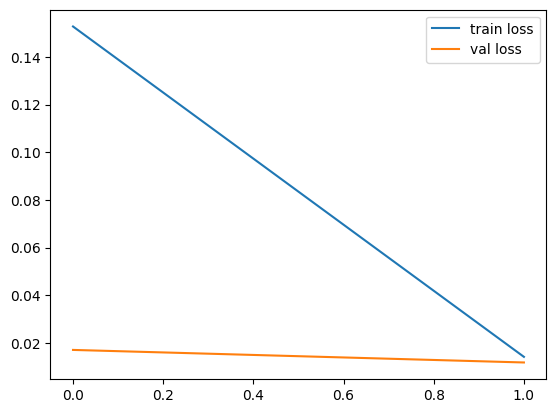

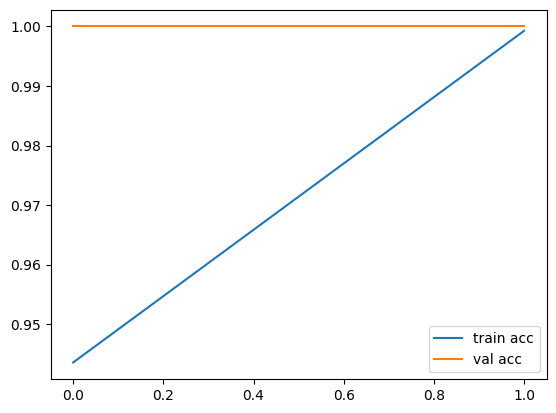

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(newmodel_svm.history['loss'], label='train loss')
plt.plot(newmodel_svm.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(newmodel_svm.history['accuracy'], label='train acc')
plt.plot(newmodel_svm.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('models/cnn_svm.h5')

In [ ]:

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Augumented/Augumented_PCOS/augmented_1_img1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 53ms/step


In [ ]:
if result[0]<0:
    print("The image belongs to PCOS PATIENT")
else:
    print("The image belongs to Non-Pcos Patient")

The image belongs to PCOS PATIENT
